# YusongChen - 441B - HW9

# 0.) Import and Clean data

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [92]:
df = pd.read_csv("Country-data.csv",sep = ",")

In [93]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [94]:
names = df[["country"]].copy()
X = df.drop("country",axis = 1)

In [95]:
# scale it first 
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [116]:
#?kmeans

In [97]:
kmeans = KMeans(n_clusters = 5).fit(X_scaled)

# 2.) Pick two features to visualize across

In [98]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

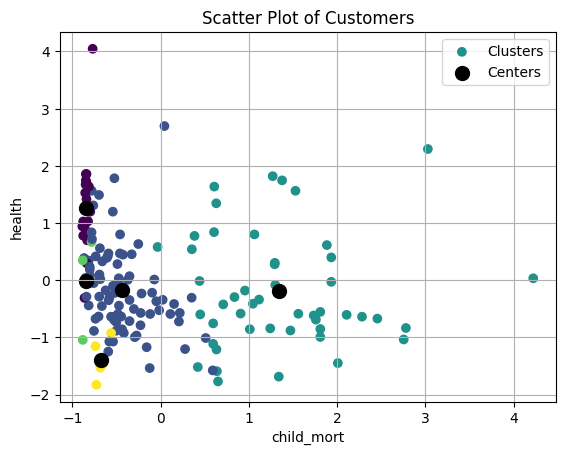

In [99]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 2 # you can type here to see different picture


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [100]:
WCSSs = []
Ks = range(1,15) 

for k in Ks:
    kmeans  = KMeans(n_clusters = k,n_init = 30).fit(X_scaled)
    WCSSs.append(kmeans.inertia_)

In [101]:
# Option do in 1 line of code
WCSSs = [KMeans(n_clusters = k,n_init = 30).fit(X_scaled).inertia_ for k in range(1,15)]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

Text(0, 0.5, 'WCSS ')

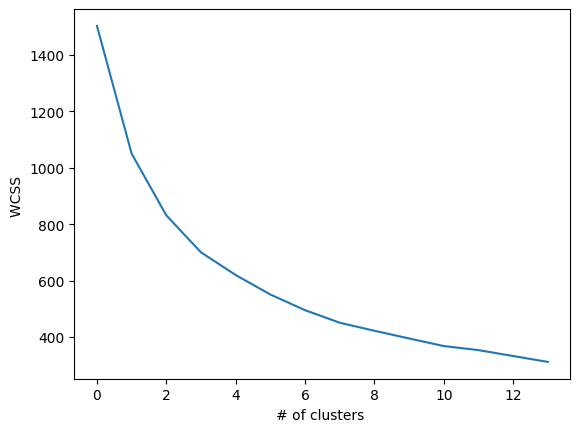

In [102]:
plt.plot(WCSSs)
plt.show
plt.xlabel("# of clusters ")
plt.ylabel("WCSS ")
# x-axis is the # of clusters 
# the first row is x but actually is k = 1, so everything in x-axis should be shifted by 1 

# 6.) Do the same for a silhoutte plot

In [103]:
from sklearn.metrics import silhouette_score

In [104]:
SSs = []
Ks = range(2,15) # this should at least have 2 clusters because you need to compare to other clusters

for k in Ks:
    kmeans  = KMeans(n_clusters = k,n_init = 30).fit(X_scaled)
    sil = silhouette_score(X_scaled,kmeans.labels_)
    SSs.append(sil)

Text(0, 0.5, 'SS ')

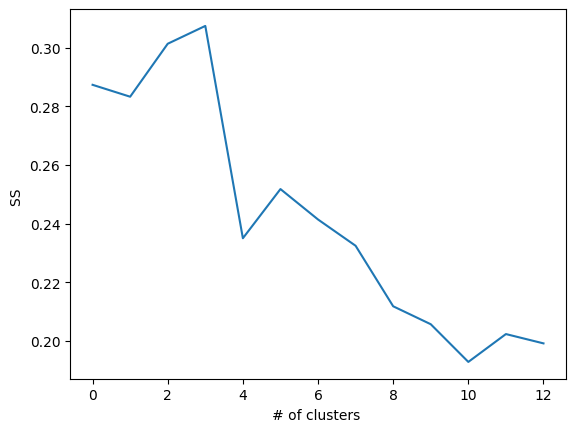

In [105]:
plt.plot(SSs)
plt.show
plt.xlabel("# of clusters ")
plt.ylabel("SS ")
# x-axis is the # of clusters 
# the first row is x but actually is k = 1, so everything in x-axis should be shifted by 1 
# This is not the straghit going down line, it just goes uo and down

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [106]:
kmeans  = KMeans(n_clusters = 2,n_init = 30).fit(X_scaled)

In [107]:
preds = pd.DataFrame(kmeans.labels_)

In [108]:
output = pd.concat([preds,df],axis = 1) 
# concat just combine the data based on the matching column number 

In [109]:
output

,0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,0,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,1,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,0,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...
162,1,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,0,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,0,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,1,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [110]:
print("Cluster1:" )
list(output.loc[output[0] == 0,"country"])

Cluster1:


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Canada',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Hungary',
 'Iceland',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Malta',
 'Mauritius',
 'Moldova',
 'Montenegro',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Sey

In [111]:
print("Cluster2:" )
list(output.loc[output[0] == 1,"country"])

Cluster2:


['Afghanistan',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Turkmenistan',
 'Uganda',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

In [112]:
#### Write an observation

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [113]:
output.drop("country",axis = 1)

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,0,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,1,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,0,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,1,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,0,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,0,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,1,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [114]:
output.drop("country",axis = 1).groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798
1,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294


In [115]:
output.drop("country",axis = 1).groupby(0).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127
1,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189


In [117]:
Q8DF = pd.concat([preds,X],axis = 1 )
Q8DF.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798
1,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294


In [118]:
Q8DF.groupby(0).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127
1,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189


# 9.) Write an observation about the descriptive statistics.

Looking at the mean we outprint above, according to the gdp's difference, we can tell that the first cluster might be the developed country and second cluster may be the developing country. The first cluster tend to have higherexports,imports,health,income and life_expec number and lower child-mort inflation and total_fer number.